In [1]:
from sklearn import datasets
import numpy as np

# Irisデータセットの読み込みと抽出

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# 訓練データセットとテストデータセットに分割
シャッフルしてから分割してる→データが偏らないようにする  
random_stateはseed値のことで，同じ値を渡したら同じランダム値が返ってくる（だから書籍の結果と同じになる）  
stratify：層化サンプリング（trainとtestに含まれているクラスラベルの比率が入力データ(y)と同じであること）

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

確認用

In [4]:
print('Labels count in y:', np.bincount(y))
print('Lavels count in y_train:', np.bincount(y_train))
print('Lavels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Lavels count in y_train: [35 35 35]
Lavels count in y_test: [15 15 15]


三種類のラベルが同じ比率で含まれていることがわかる

# 特徴量の標準化（スケーリング）

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # StandardScalerクラスのインスタンス生成
sc.fit(X_train) # 訓練データの平均と標準偏差を計算
X_train_std = sc.transform(X_train) # 訓練データセットの標準化
X_test_std = sc.transform(X_test) # テストデータセットの標準化（訓練データと相互比較できるようにするため）

# scikit-learnを使ってパーセプトロンの学習

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1) # 学習率0.1, エポック数40
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

# 予測

In [7]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


45個の点のうち，1つだけ間違えているので誤分類率は約2.2%（正解率約97.8）

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % (accuracy_score(y_test, y_pred)))

Accuracy: 0.978


metricsモジュールでも確認できる

In [9]:
print('Accuracy: %.3f' % (ppn.score(X_test_std, y_test)))

Accuracy: 0.978


分類器のscoreメソッドでも確認できる

# 決定境界の描画

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # テストデータ点を目立たせる
    if test_idx:

        X_test, y_test = X[test_idx, :], y[test_idx]
        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


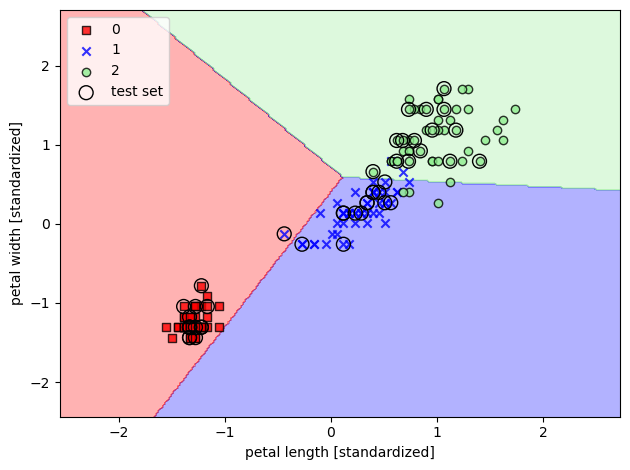

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# シグモイド関数

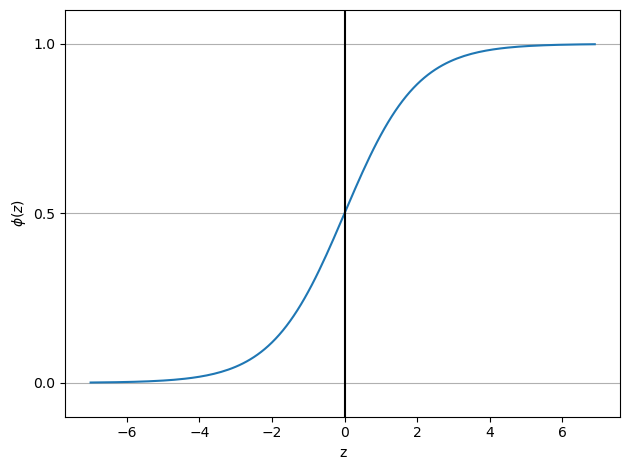

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k') # 垂直線 ax vline（垂直） ax hline（水平線）
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # 現在の座標軸を返す
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# 単一データの分類コスト（尤度最大化）

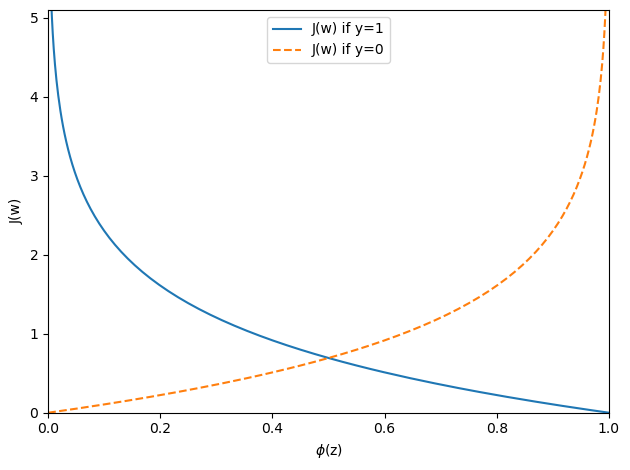

In [13]:
def cost_1(z): #y=1のコストを計算
    return - np.log(sigmoid(z))

def cost_0(z): # y=0のコストを計算
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z) # φ(z) = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

データ点がクラス1に所属している(y=1)ことが予測できていたら，コストが0に近づく（実線）
データ点がクラス0に所属している(y=0)ことが予測できていたら，コストが0に近づく（点線）

# ロジスティック回帰実装（（バッチ）勾配降下法）

In [14]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input) # 活性化関数はシグモイド関数
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = - y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) # 1/尤度最大化→コスト最小化
            self.cost_.append(cost)
        return self

    def net_input(self, X): # 総入力
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z): # 活性化関数（シグモイド間数）
        return 1. / (1. + np.exp(-np.clip(z, -250, 250))) # -250から250までの間にzをおさめる（溢れ値は最小/最大値に変換）
    
    def predict(self, X): # 1ステップごとの予測値(1 or -1)を返す
        return np.where(self.net_input(X) >= 0.0, 1, 0) # 0より大きかったら1，そうでないなら0を返す 

2値分類タスクのために，Setosa(クラス0)とVersicolor(クラス1)だけ抽出

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


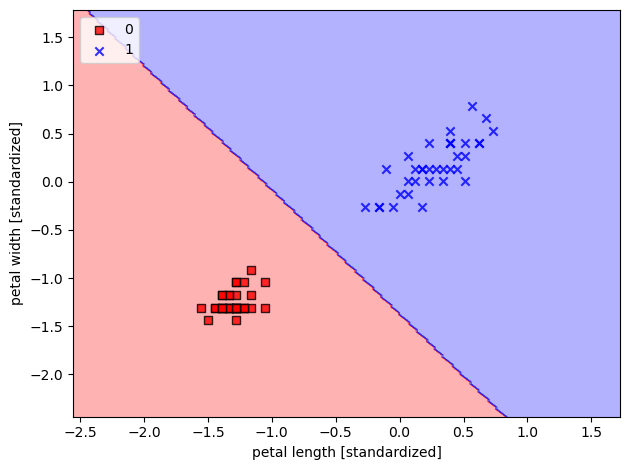

In [15]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# scikit-learnを使ったロジスティック回帰モデルの学習
lbfgs...Limited-memory-Broyden=Fletcher-Goldfarb-shanno

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


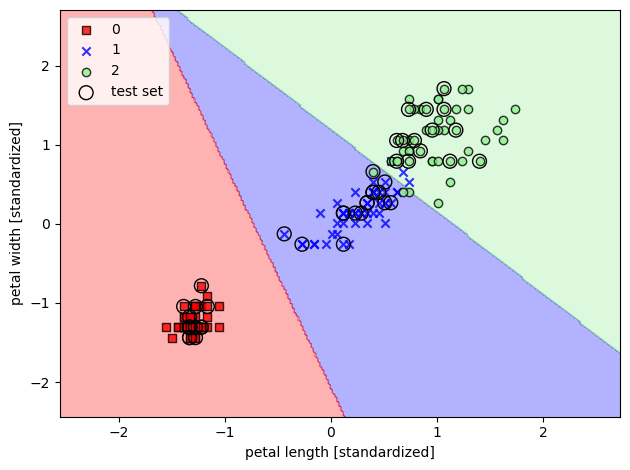

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 訓練データが特定のクラスに所属する確率

In [17]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

1行目：1つ目のデータ点に関するクラスの所属確率（0.85でクラス3に所属する確率が一番高い）

In [18]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1) # クラスラベルの予測値を取得できる

array([2, 0, 0])

In [19]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

scikit-learnはデータ入力に2次元配列を求めているので  
1行のデータ(1次元データ）を2次元のデータ配列に変換する必要がある

In [20]:
lr.predict(X_test_std[0, :].reshape(1, -1)) # -1は勝手に長さ決めてくれる

array([2])

# （逆）正則化パラメータ

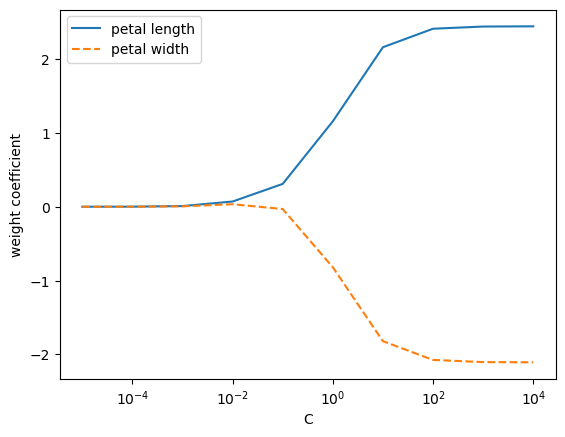

In [21]:
weights, params = [], [] # 重み，逆正則化パラメータ
for c in np.arange(-5, 5): 
    lr = LogisticRegression(C=10.**c, random_state=1,
                            solver='lbfgs',
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

パラメータCが減少し，正則化の強さが増すと重み係数が0に近づいていく

# SVM

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


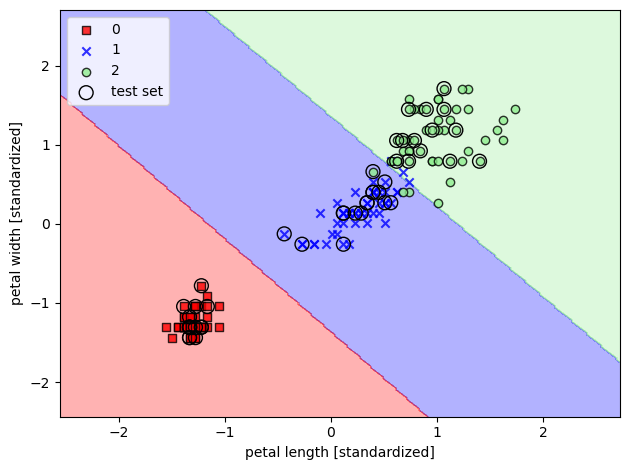

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

# 線形分離不可能なデータに対するカーネル手法

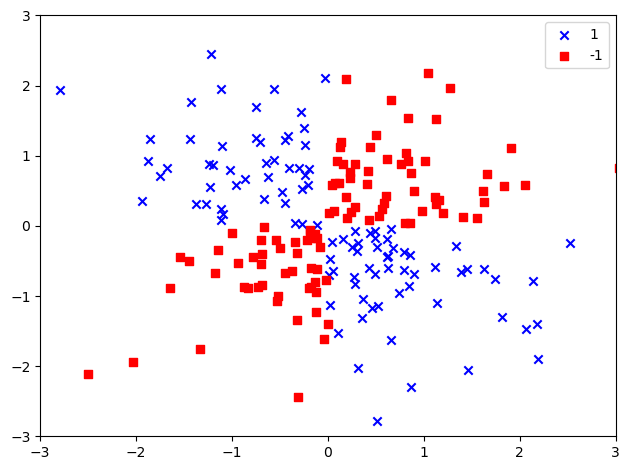

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

X_xor = np.random.randn(200, 2) # 標準正規分布に従う乱数で200行2列の行列生成
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 2つの引数に対して排他的論理和（どちらかが1）を実行
y_xor = np.where(y_xor, 1, -1) # XORが真→1, 偽→-1

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

線形分離不可能→高次元空間へ射影

# RGFカーネルによるSVM

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


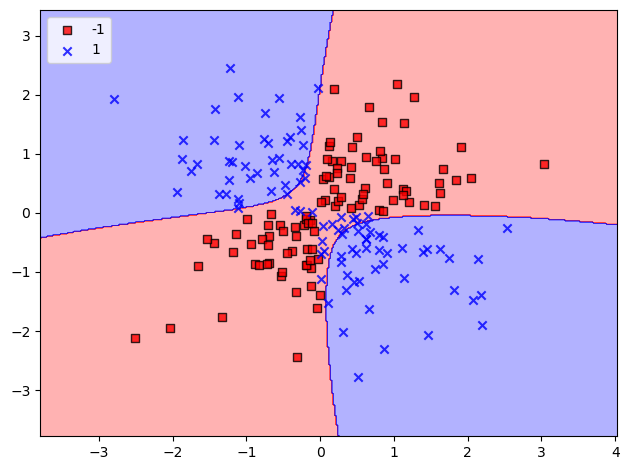

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


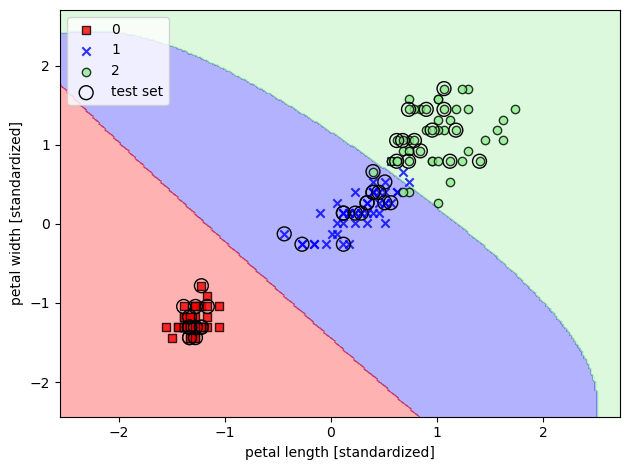

In [25]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


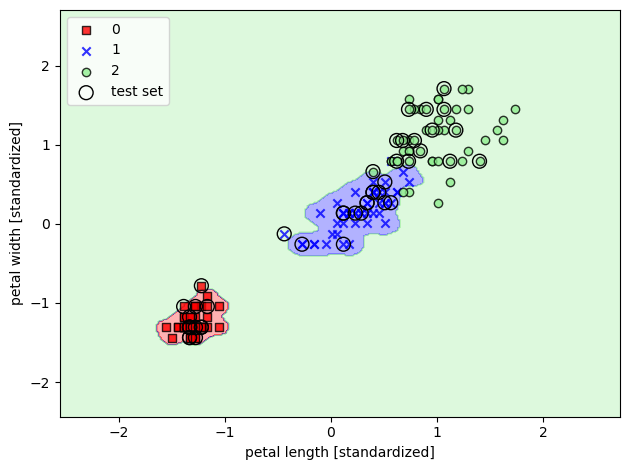

In [26]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 不純度条件

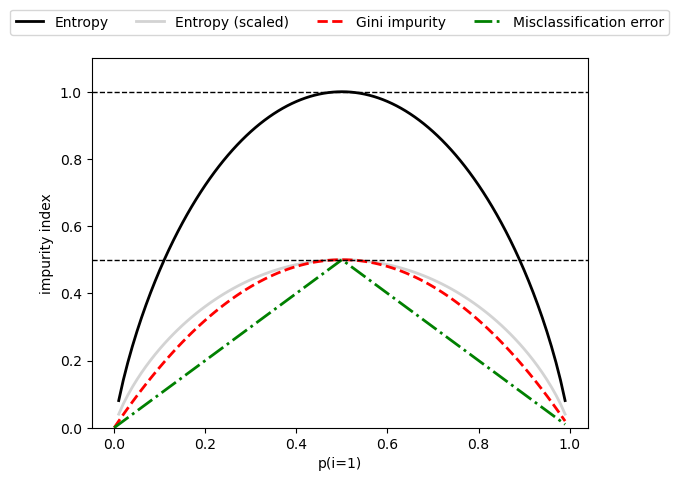

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p): # ジニ不純度
    return p * (1 - p) + (1 - p) * (1 - (1 - p)) 

def entropy(p): # エントロピー
    return - p*np.log2(p) - (1 - p)*np.log2(1 - p)

def error(p): # 分類誤差
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

# エントロピー関数はp=0のときnanを返してしまうので処理が必要
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]

# 分類誤差はリストの先頭の計算結果のみ返すので処理が必要
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

確かに，ジニ不純度はエントロピーと分類誤差の中間に位置づけられている  
決定木では，数値の分割条件を値の大小関係として捉えるので，  
特徴量をスケーリングしても閾値の値が変化するに過ぎないので問題なし

# 決定木実装
ジニ不純度を用いた深さ4の決定木

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


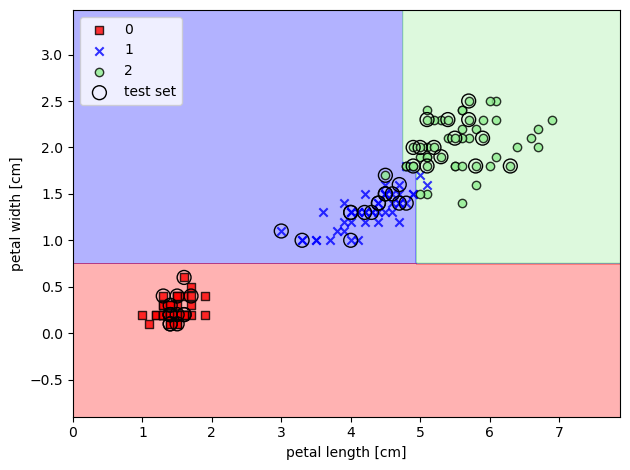

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

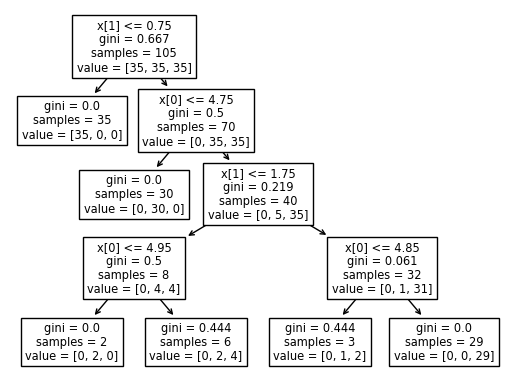

In [31]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

In [36]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True

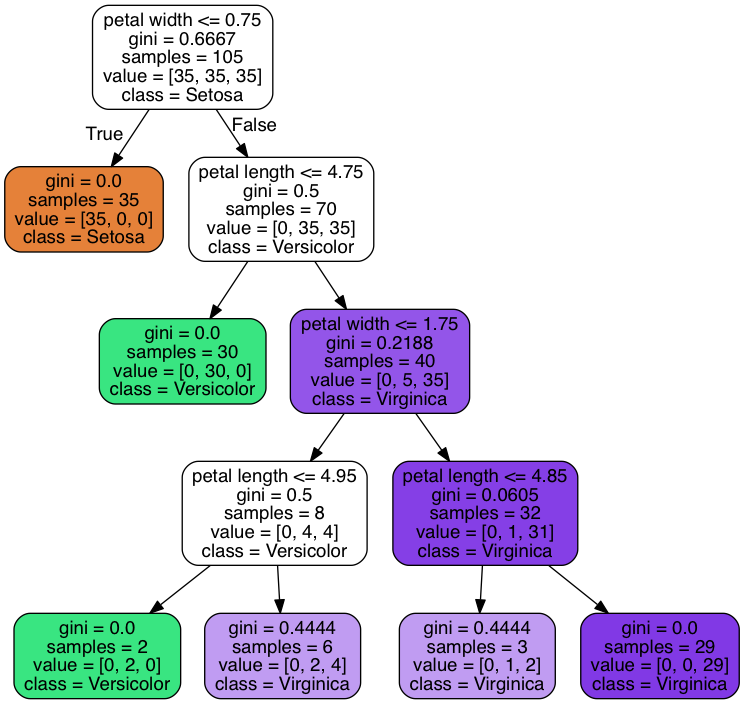

In [38]:
from IPython.display import Image
Image(filename='images/03_21.png', width=600)

分割1：左の子ノードがSetosaのみのデータを含んでいて純粋（ジニ不純度0）

# ランダムフォレスト

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


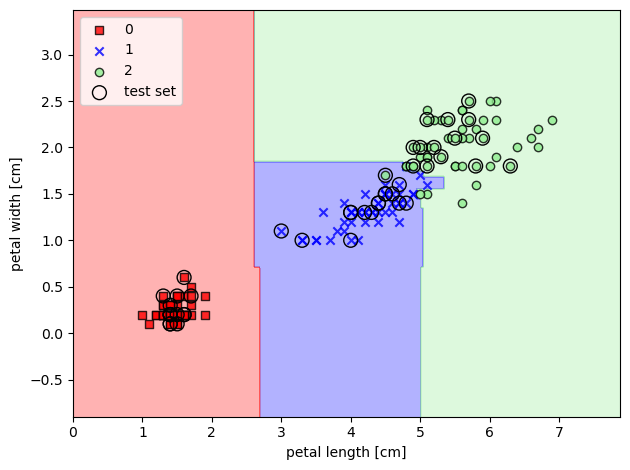

In [39]:
from sklearn.ensemble import RandomForestClassifier

# 25個の決定木かランダムフォレストを訓練, 2つのコアで並列化
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# KNNモデルの実装 （ユークリッド距離）

/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/var/folders/9z/vmk05b5s1mlcffm1x6y0_p8w0000gn/T/ipykernel_76553/4089947931.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


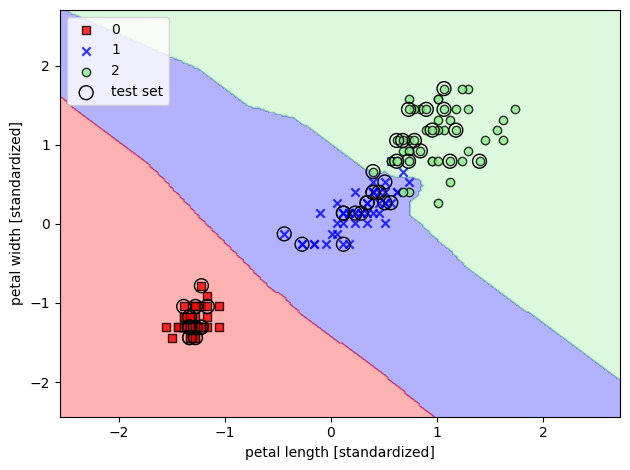

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()